# Machine Learning Exercise 1 - Linear Regression

This notebook covers a Python-based solution for the first programming assigment of the machine learning class on [Coursera](https://www.coursera.org/learn/machine-learning). Please refer to the [exercise text](https://github.com/eriansha/coursera-machine_learning/blob/master/pdf/ex1.pdf) for detailed descriptions and equations.

In this exercise we'll implement simple linear regression using gradient descent and apply it to an example problem.

## Linear Regressions with One Variable

In the first part of the exercise, we'll implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
path = '../data/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profits'])
data.head()

,Population,Profits
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profits       97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


### Plot the data

Before starting on any task, it is often useful to understand the data by
visualizing it

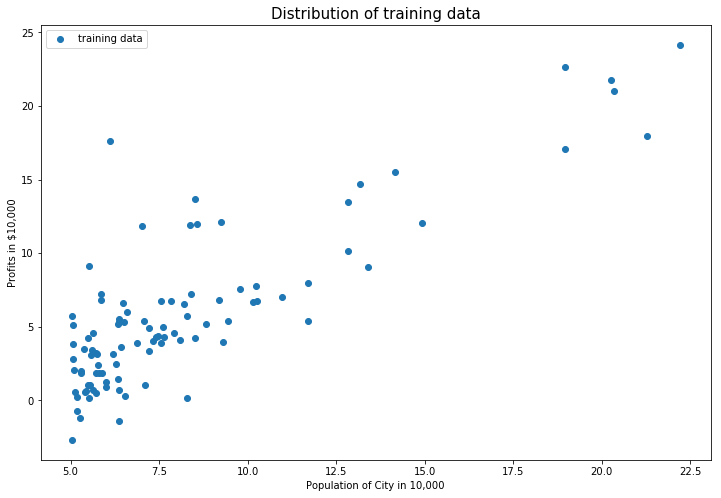

In [4]:
X = data['Population']
y = data['Profits']

plt.figure(figsize=(12,8))

plt.scatter(X, y, label='training data')

plt.xlabel("Population of City in 10,000", fontsize=10)
plt.ylabel("Profits in $10,000", fontsize=10)
plt.title("Distribution of training data", fontsize=15)

plt.legend(loc='upper left')

Before implement linear regression, we should add ones column in data

In [5]:
# add ones columns
data.insert(0, 'Ones', 1)

In [6]:
# initializing some useful variables
X = data[['Ones', 'Population']]
y = pd.Series.to_frame(data['Profits']) # keep y to be dataframe

# some useful parameter
m = data.shape[0]
iterr = 1000
alpha = 0.01

In [7]:
# feature
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [8]:
# label
y.head()

,Profits
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


## Gradient Descent and Cost Function

In this part, we will fit the linear regression parameters θ to our dataset using gradient descent.

In [9]:
# cost function
def computeCost(X, y, theta):
    """
    Calculate cost function using mean squared error method.
    
    keyworad arguments:
    X -- feature of dataset
    y -- target/lable of dataset
    theta -- parameters/weight of cost function
    
    return : mean squared error
    """
    temp = np.power(((X * theta.T) - y), 2)
    return np.sum(temp) / (2 * m)

The cost function is expecting numpy matrices so we need to convert X and y before we can use them. We also need to initialize theta.

In [10]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix((np.array([0,0])))

In [11]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [12]:
print('Cost value at theta {} : {}'.format(theta, computeCost(X, y, theta)))

Cost value at theta [[0 0]] : 32.072733877455676


In [13]:
def gradientDescent(X, y, theta, alpha, iterr):
    """
    Calculate batch gradient descent from mean squared error method to find minimum cost J(θ).
    
    keyworad arguments:
    X -- feature of dataset
    y -- target/lable of dataset
    theta -- parameters/weight of cost function
    alpha -- learning rate
    iterr -- max epoch
    
    return :
    theta -- new parameters of cost function
    cost --  ....
    hist_theta -- ... 
    """
    
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    # to monitor cost function
    cost = np.zeros(iterr)
    # to monitor theta
    hist_theta = np.zeros([iterr, parameters])
    
    for i in range(iterr):
        # calculate error using sum of square error cost function
        error = (X * theta.T) - y
        
        for j in range(parameters):
            sum_error = np.sum(np.multiply(error, X[:,j])) # elementwise multiplication
            temp[0,j] = theta[0,j] - (alpha * (1 / m)) * sum_error
            hist_theta[i, j] = temp[0,j]
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost, hist_theta

In [14]:
theta, cost, hist_theta = gradientDescent(X, y, theta, alpha, iterr)
theta

matrix([[-3.24140214,  1.1272942 ]])

In [15]:
print('Cost value at theta {} : {}'.format(theta, computeCost(X, y, theta)))

Cost value at theta [[-3.24140214  1.1272942 ]] : 4.515955503078912


### Plot the linear model

Now, let's plot our linear model to see how it fits

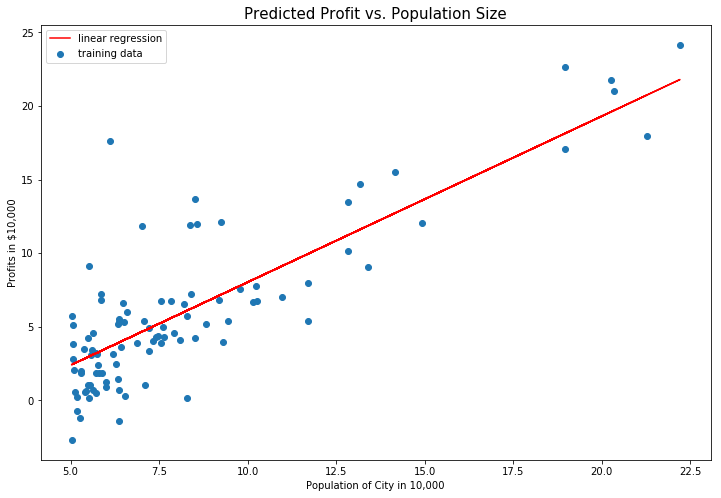

In [16]:
f = theta[0,0] * X[:,0] + (theta[0,1] * X[:,1])

plt.figure(figsize=(12,8)) 
train = plt.scatter(data['Population'], data['Profits'], label='training data')
linReg = plt.plot(data['Population'], f, 'r-', label='linear regression')

plt.title('Predicted Profit vs. Population Size', fontsize=15)
plt.xlabel("Population of City in 10,000", fontsize=10)
plt.ylabel("Profits in $10,000", fontsize=10)

plt.legend()

In [17]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = theta[0,0] * 1 + theta[0,1] * 3.5
print('For 35,000 population, we predict a profit of {0}'.format((predict1 * 10000).item(0)))

predict2 = theta[0,0] * 1 + theta[0,1] * 7
print('For 70,000 population, we predict a profit of {0}'.format((predict2 * 10000).item(0)))

For 35,000 population, we predict a profit of 7041.275642242231
For 70,000 population, we predict a profit of 46496.572727228675


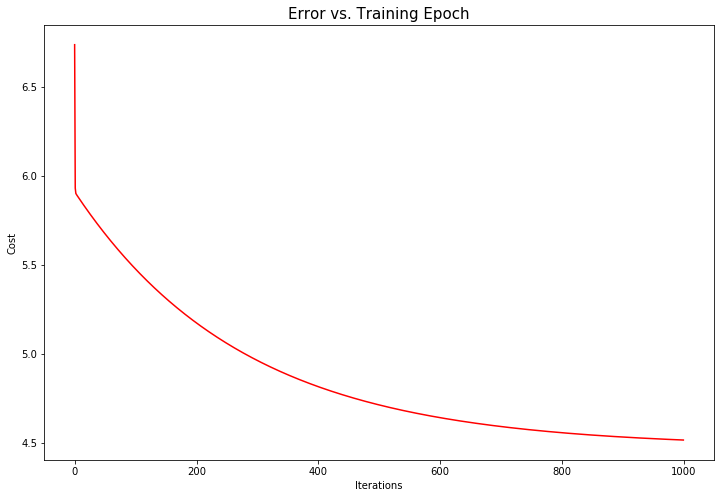

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iterr), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch', fontsize=15)

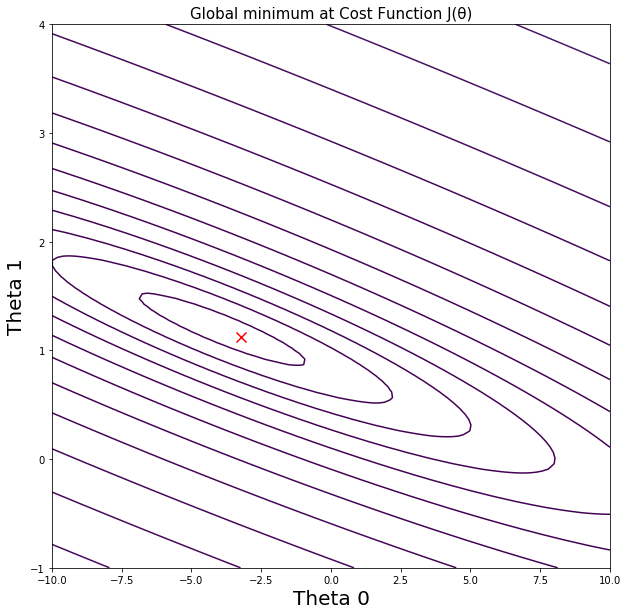

In [19]:
# Contour plot

fig = plt.figure(figsize=(10,10))

theta0_vals = np.linspace(-10, 10, num=100)
theta1_vals = np.linspace(-1, 4, num=100)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        t = np.matrix([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = computeCost(X, y, t)

J_vals = J_vals.T
        
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-1, 4, 30))
#plt.plot(theta[0,0], theta[0,1], 'rx', MarkerSize=10, LineWidth=5)
plt.scatter(theta[0,0], theta[0,1], marker="x", c='red', s=100)

plt.xlabel("Theta 0", fontsize=20)
plt.ylabel("Theta 1", fontsize=20)
plt.title("Global minimum at Cost Function J(θ)", fontsize=15)

# Linear regression with multiple variables

In this part, we'll implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

In [20]:
path = '../data/ex1data2.txt'
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Plot 3D dataset

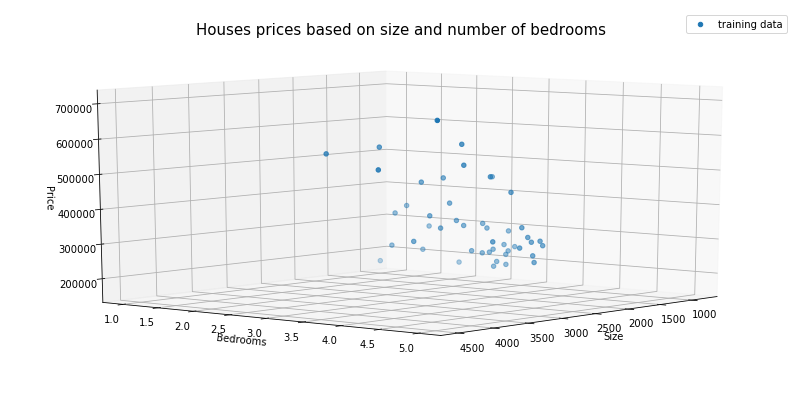

In [21]:
# for 3D plot
#%matplotlib notebook
#import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111, projection='3d')
        
# for 3D plot
ax.scatter(data['Size'], data['Bedrooms'], data['Price'], label='training data')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')   

plt.title('Houses prices based on size and number of bedrooms' , fontsize=15)
plt.legend(loc='best')
ax.view_init(elev=10., azim=40)

# rotate the axes to 40 degree
ax.view_init(elev=10., azim=40)

Because the houses sizes are about 1000 times the number of bedrooms, we'll do pre-processing step, normalization. This step can make gradient descent converge much more quickly. For this exercise, we'll do mean normalization (standardization).

In [22]:
data = (data - data.mean()) / data.std()
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Now, repeat the previous process in first exercise to implement linear regression

In [23]:
# add ones columns
data.insert(0, 'Ones', 1)

In [24]:
# some useful parameter
m = data.shape[0]
iterr = 400
alpha = 0.01

# separe data into two, X (training data) and y (target data)
X = data[['Ones', 'Size', 'Bedrooms']]
y = pd.Series.to_frame(data['Price']) # keep y to be dataframe

# convert to matrices and initialize theta
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]))

In [25]:
X.shape, y.shape, theta.shape

((47, 3), (47, 1), (1, 3))

### Calculate Gradient Descent and Cost Function (Multi Variable) 

In [26]:
# perform linear regression on the dataset
theta, cost, hist_theta = gradientDescent(X, y, theta, alpha, iterr)

# get the error
computeCost(X, y, theta)

0.13368618563317541

In [27]:
predict3 = theta[0,1] * 1650 + theta[0,2] * 3
print('For 1650 sq-ft and 3 bathrooms, we predict a price of {}'.format((predict3 * 10000)))

For 1650 sq-ft and 3 bathrooms, we predict a price of 13208164.961847208


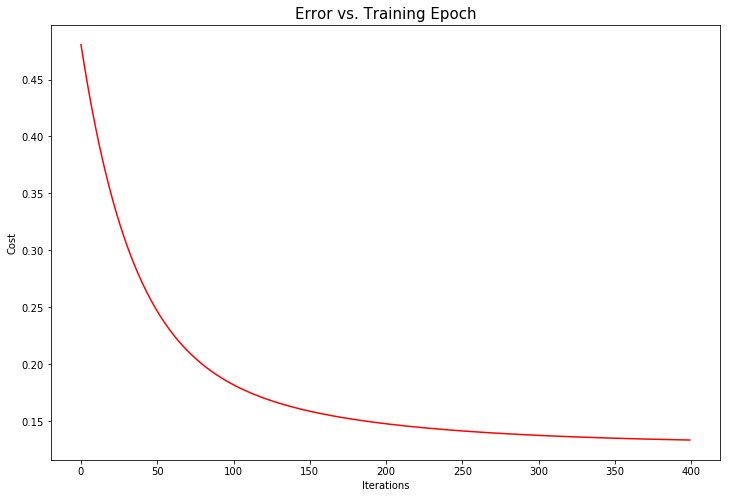

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iterr), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch', fontsize=15)